 A1) Write a function to calculate the entropy associated with your dataset. (If your dataset contains
only continuous numeric data for outcome (a regression problem), employ equal width binning and
divide your data into 4 bins. Each bin may be considered as a categorical data value. Write a function
for equal width binning).
Here, pi refers to the probability of occurrence of each outcome value.

In [ ]:
import numpy as np
import pandas as pd

def calculate_entropy(labels):

    _, counts = np.unique(labels, return_counts=True)
    probabilities = counts / counts.sum()
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

def equal_width_binning(data, num_bins=4):

    bins = np.linspace(np.min(data), np.max(data), num_bins + 1)
    binned_data = np.digitize(data, bins, right=True)
    return binned_data

file_path = "/content/drive/MyDrive/Colab Notebooks/ML_PROJECT/DWI_with_Labels.xlsx"
df = pd.read_excel(file_path)

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

binned_feature = equal_width_binning(df.iloc[:, 0], num_bins=4)

entropy_value = calculate_entropy(binned_feature)
print(f"Entropy of the binned feature: {entropy_value:.4f}")

Entropy of the binned feature: -0.0000


A2)  Calculate the Gini index value

In [ ]:
def calculate_gini(labels):

    _, counts = np.unique(labels, return_counts=True)
    probabilities = counts / counts.sum()
    gini = 1 - np.sum(probabilities**2)
    return gini

gini_value = calculate_gini(binned_feature)
print(f"Gini Index of the binned feature: {gini_value:.4f}")

Gini Index of the binned feature: 0.0000


A3) Write your own module for detecting the feature / attribute for the root note of a Decision Tree.
Use Information gain as the impurity measure for identifying the root node. Assume that the
features are categorical or could be converted to categorical by binning.  

In [ ]:
def information_gain(data, labels, feature_idx, num_bins=4):

    parent_entropy = calculate_entropy(labels)
    binned_feature = equal_width_binning(data[:, feature_idx], num_bins)

    unique_values, counts = np.unique(binned_feature, return_counts=True)
    weighted_entropy = 0

    for value, count in zip(unique_values, counts):
        subset_labels = labels[binned_feature == value]
        subset_entropy = calculate_entropy(subset_labels)
        weighted_entropy += (count / len(labels)) * subset_entropy

    info_gain = parent_entropy - weighted_entropy
    return info_gain

num_features = X.shape[1]
info_gains = [information_gain(X, y, i, num_bins=4) for i in range(num_features)]

best_feature_idx = np.argmax(info_gains)
print(f"Best root node is feature {best_feature_idx} with Information Gain: {info_gains[best_feature_idx]:.4f}")

Best root node is feature 5646 with Information Gain: 0.1911


A4)  If the feature is continuous valued for A3, use equal width or frequency binning for converting
the attribute to categorical valued. The binning type should be a parameter to the function built for
binning. Write your own function for the binning task. The number of bins to be created should also
be passed as a parameter to the function. Use function overloading to allow for usage of default
parameters if no parameters are passed.

In [ ]:
def robust_binning(data, num_bins=4, apply_binning=True):

    if not apply_binning:
        return data

    if np.min(data) == np.max(data):
        return np.zeros(len(data))

    binned_data = pd.cut(data, bins=num_bins, labels=False, duplicates="drop")
    return binned_data.fillna(0)

binned_feature = robust_binning(df.iloc[:, 0], num_bins=4, apply_binning=True)

print(f"First 10 values after robust binning: {binned_feature[:10]}")


First 10 values after robust binning: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


A5) Expand the above functions to built your own Decision Tree module.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Decision Tree Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Decision Tree Accuracy: 0.6412
Precision: 0.6364
Recall: 0.5316
F1 Score: 0.5793


A6) Draw and visualize the decision tree constructed based on your data. (Refer above provided web
sources [1] & [2] for understanding and learning on how to visualize a DT).

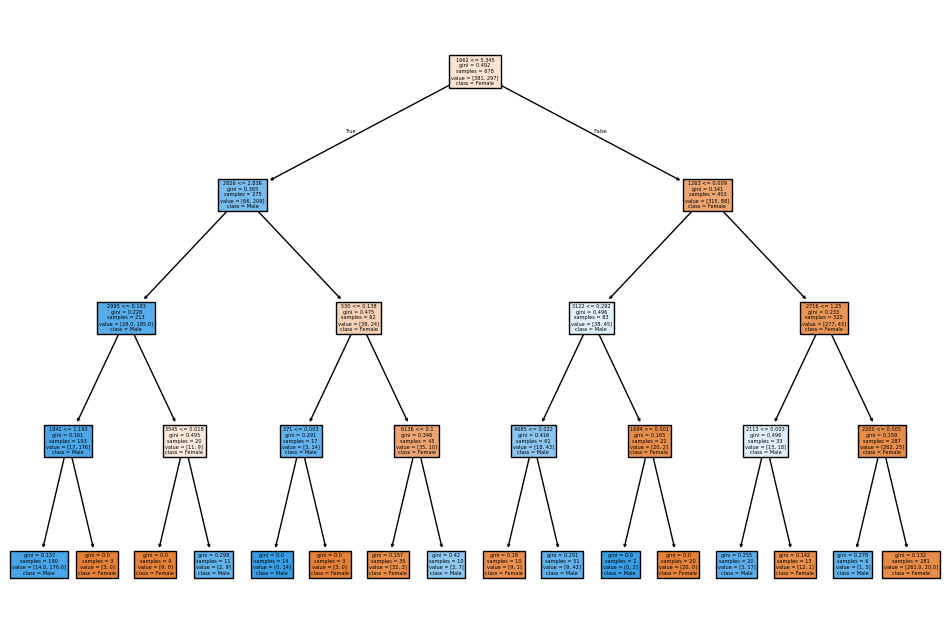

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=df.columns[:-1], class_names=["Female", "Male"], filled=True)
plt.show()

A7) Use 2 features from your dataset for a classification problem. Visualize the decision boundary
created by your DT in the vector space. (Refer above provided web source [3] & [2] for
understanding and learning on how to draw decision boundary for a DT).

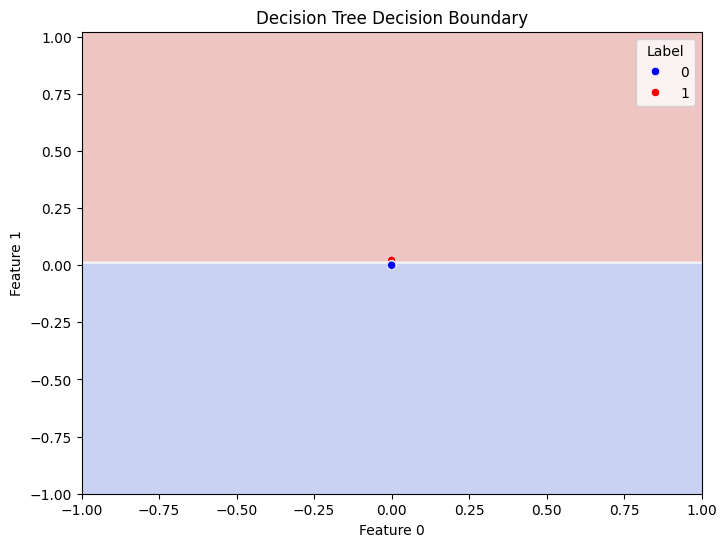

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

feature1 = 0
feature2 = 1
X_2D = X_train.iloc[:, [feature1, feature2]].values


clf_2D = DecisionTreeClassifier(max_depth=4, random_state=42)
clf_2D.fit(X_2D, y_train)

x_min, x_max = X_2D[:, 0].min() - 1, X_2D[:, 0].max() + 1
y_min, y_max = X_2D[:, 1].min() - 1, X_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

Z = clf_2D.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
sns.scatterplot(x=X_2D[:, 0], y=X_2D[:, 1], hue=y_train, palette=["blue", "red"])
plt.xlabel(f"Feature {feature1}")
plt.ylabel(f"Feature {feature2}")
plt.title("Decision Tree Decision Boundary")
plt.show()